# House Price Predicition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_openml
df = fetch_openml(name="house_prices")

C:\Users\kadam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
df

{'data':         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
 0        1          60       RL         65.0     8450   Pave  None      Reg  \
 1        2          20       RL         80.0     9600   Pave  None      Reg   
 2        3          60       RL         68.0    11250   Pave  None      IR1   
 3        4          70       RL         60.0     9550   Pave  None      IR1   
 4        5          60       RL         84.0    14260   Pave  None      IR1   
 ...    ...         ...      ...          ...      ...    ...   ...      ...   
 1455  1456          60       RL         62.0     7917   Pave  None      Reg   
 1456  1457          20       RL         85.0    13175   Pave  None      Reg   
 1457  1458          70       RL         66.0     9042   Pave  None      Reg   
 1458  1459          20       RL         68.0     9717   Pave  None      Reg   
 1459  1460          20       RL         75.0     9937   Pave  None      Reg   
 
      LandContour Utilities  .

In [4]:
type(df)

sklearn.utils._bunch.Bunch

# Preparing Dataset

In [5]:
pd.DataFrame(df.data)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0        1          60       RL         65.0     8450   Pave  None      Reg  \
1        2          20       RL         80.0     9600   Pave  None      Reg   
2        3          60       RL         68.0    11250   Pave  None      IR1   
3        4          70       RL         60.0     9550   Pave  None      IR1   
4        5          60       RL         84.0    14260   Pave  None      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave  None      Reg   
1456  1457          20       RL         85.0    13175   Pave  None      Reg   
1457  1458          70       RL         66.0     9042   Pave  None      Reg   
1458  1459          20       RL         68.0     9717   Pave  None      Reg   
1459  1460          20       RL         75.0     9937   Pave  None      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence   
0            Lvl    AllPub  ...           0        0   None   None  \
1            Lvl    AllPub  ...           0        0   None   None   
2            Lvl    AllPub  ...           0        0   None   None   
3            Lvl    AllPub  ...           0        0   None   None   
4            Lvl    AllPub  ...           0        0   None   None   
...          ...       ...  ...         ...      ...    ...    ...   
1455         Lvl    AllPub  ...           0        0   None   None   
1456         Lvl    AllPub  ...           0        0   None  MnPrv   
1457         Lvl    AllPub  ...           0        0   None  GdPrv   
1458         Lvl    AllPub  ...           0        0   None   None   
1459         Lvl    AllPub  ...           0        0   None   None   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0           None       0      2    2008        WD         Normal  
1           None       0      5    2007        WD         Normal  
2           None       0      9    2008        WD         Normal  
3           None       0      2    2006        WD        Abnorml  
4           None       0     12    2008        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1455        None       0      8    2007        WD         Normal  
1456        None       0      2    2010        WD         Normal  
1457        Shed    2500      5    2010        WD         Normal  
1458        None       0      4    2010        WD         Normal  
1459        None       0      6    2008        WD         Normal  

[1460 rows x 80 columns]

In [6]:
df.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
dataset = pd.DataFrame(df.data)

In [8]:
dataset

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0        1          60       RL         65.0     8450   Pave  None      Reg  \
1        2          20       RL         80.0     9600   Pave  None      Reg   
2        3          60       RL         68.0    11250   Pave  None      IR1   
3        4          70       RL         60.0     9550   Pave  None      IR1   
4        5          60       RL         84.0    14260   Pave  None      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave  None      Reg   
1456  1457          20       RL         85.0    13175   Pave  None      Reg   
1457  1458          70       RL         66.0     9042   Pave  None      Reg   
1458  1459          20       RL         68.0     9717   Pave  None      Reg   
1459  1460          20       RL         75.0     9937   Pave  None      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence   
0            Lvl    AllPub  ...           0        0   None   None  \
1            Lvl    AllPub  ...           0        0   None   None   
2            Lvl    AllPub  ...           0        0   None   None   
3            Lvl    AllPub  ...           0        0   None   None   
4            Lvl    AllPub  ...           0        0   None   None   
...          ...       ...  ...         ...      ...    ...    ...   
1455         Lvl    AllPub  ...           0        0   None   None   
1456         Lvl    AllPub  ...           0        0   None  MnPrv   
1457         Lvl    AllPub  ...           0        0   None  GdPrv   
1458         Lvl    AllPub  ...           0        0   None   None   
1459         Lvl    AllPub  ...           0        0   None   None   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0           None       0      2    2008        WD         Normal  
1           None       0      5    2007        WD         Normal  
2           None       0      9    2008        WD         Normal  
3           None       0      2    2006        WD        Abnorml  
4           None       0     12    2008        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1455        None       0      8    2007        WD         Normal  
1456        None       0      2    2010        WD         Normal  
1457        Shed    2500      5    2010        WD         Normal  
1458        None       0      4    2010        WD         Normal  
1459        None       0      6    2008        WD         Normal  

[1460 rows x 80 columns]

In [9]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0   1          60       RL         65.0     8450   Pave  None      Reg  \
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature   
0         Lvl    AllPub  ...           0        0   None  None        None  \
1         Lvl    AllPub  ...           0        0   None  None        None   
2         Lvl    AllPub  ...           0        0   None  None        None   
3         Lvl    AllPub  ...           0        0   None  None        None   
4         Lvl    AllPub  ...           0        0   None  None        None   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      2    2008        WD         Normal  
1       0      5    2007        WD         Normal  
2       0      9    2008        WD         Normal  
3       0      2    2006        WD        Abnorml  
4       0     12    2008        WD         Normal  

[5 rows x 80 columns]

In [10]:
dataset.columns = df.feature_names
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0   1          60       RL         65.0     8450   Pave  None      Reg  \
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature   
0         Lvl    AllPub  ...           0        0   None  None        None  \
1         Lvl    AllPub  ...           0        0   None  None        None   
2         Lvl    AllPub  ...           0        0   None  None        None   
3         Lvl    AllPub  ...           0        0   None  None        None   
4         Lvl    AllPub  ...           0        0   None  None        None   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      2    2008        WD         Normal  
1       0      5    2007        WD         Normal  
2       0      9    2008        WD         Normal  
3       0      2    2006        WD        Abnorml  
4       0     12    2008        WD         Normal  

[5 rows x 80 columns]

In [11]:
dataset['Price'] = df.target

In [12]:
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0   1          60       RL         65.0     8450   Pave  None      Reg  \
1   2          20       RL         80.0     9600   Pave  None      Reg   
2   3          60       RL         68.0    11250   Pave  None      IR1   
3   4          70       RL         60.0     9550   Pave  None      IR1   
4   5          60       RL         84.0    14260   Pave  None      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold   
0         Lvl    AllPub  ...        0   None  None        None       0      2  \
1         Lvl    AllPub  ...        0   None  None        None       0      5   
2         Lvl    AllPub  ...        0   None  None        None       0      9   
3         Lvl    AllPub  ...        0   None  None        None       0      2   
4         Lvl    AllPub  ...        0   None  None        None       0     12   

  YrSold  SaleType  SaleCondition   Price  
0   2008        WD         Normal  208500  
1   2007        WD         Normal  181500  
2   2008        WD         Normal  223500  
3   2006        WD        Abnorml  140000  
4   2008        WD         Normal  250000  

[5 rows x 81 columns]

# Dividing dataset into independent and dependent features

In [13]:
x = dataset.iloc[:, :-1] #independent features
y = dataset.iloc[:, -1] #dependent features

In [14]:
x

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape   
0        1          60       RL         65.0     8450   Pave  None      Reg  \
1        2          20       RL         80.0     9600   Pave  None      Reg   
2        3          60       RL         68.0    11250   Pave  None      IR1   
3        4          70       RL         60.0     9550   Pave  None      IR1   
4        5          60       RL         84.0    14260   Pave  None      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave  None      Reg   
1456  1457          20       RL         85.0    13175   Pave  None      Reg   
1457  1458          70       RL         66.0     9042   Pave  None      Reg   
1458  1459          20       RL         68.0     9717   Pave  None      Reg   
1459  1460          20       RL         75.0     9937   Pave  None      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence   
0            Lvl    AllPub  ...           0        0   None   None  \
1            Lvl    AllPub  ...           0        0   None   None   
2            Lvl    AllPub  ...           0        0   None   None   
3            Lvl    AllPub  ...           0        0   None   None   
4            Lvl    AllPub  ...           0        0   None   None   
...          ...       ...  ...         ...      ...    ...    ...   
1455         Lvl    AllPub  ...           0        0   None   None   
1456         Lvl    AllPub  ...           0        0   None  MnPrv   
1457         Lvl    AllPub  ...           0        0   None  GdPrv   
1458         Lvl    AllPub  ...           0        0   None   None   
1459         Lvl    AllPub  ...           0        0   None   None   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0           None       0      2    2008        WD         Normal  
1           None       0      5    2007        WD         Normal  
2           None       0      9    2008        WD         Normal  
3           None       0      2    2006        WD        Abnorml  
4           None       0     12    2008        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1455        None       0      8    2007        WD         Normal  
1456        None       0      2    2010        WD         Normal  
1457        Shed    2500      5    2010        WD         Normal  
1458        None       0      4    2010        WD         Normal  
1459        None       0      6    2008        WD         Normal  

[1460 rows x 80 columns]

In [15]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: Price, Length: 1460, dtype: int64

# Checking missing values

In [16]:
dataset.isnull()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley   
0     False       False     False        False    False   False   True  \
1     False       False     False        False    False   False   True   
2     False       False     False        False    False   False   True   
3     False       False     False        False    False   False   True   
4     False       False     False        False    False   False   True   
...     ...         ...       ...          ...      ...     ...    ...   
1455  False       False     False        False    False   False   True   
1456  False       False     False        False    False   False   True   
1457  False       False     False        False    False   False   True   
1458  False       False     False        False    False   False   True   
1459  False       False     False        False    False   False   True   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence   
0        False        False      False  ...     False    True   True  \
1        False        False      False  ...     False    True   True   
2        False        False      False  ...     False    True   True   
3        False        False      False  ...     False    True   True   
4        False        False      False  ...     False    True   True   
...        ...          ...        ...  ...       ...     ...    ...   
1455     False        False      False  ...     False    True   True   
1456     False        False      False  ...     False    True  False   
1457     False        False      False  ...     False    True  False   
1458     False        False      False  ...     False    True   True   
1459     False        False      False  ...     False    True   True   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  Price  
0            True    False   False   False     False          False  False  
1            True    False   False   False     False          False  False  
2            True    False   False   False     False          False  False  
3            True    False   False   False     False          False  False  
4            True    False   False   False     False          False  False  
...           ...      ...     ...     ...       ...            ...    ...  
1455         True    False   False   False     False          False  False  
1456         True    False   False   False     False          False  False  
1457        False    False   False   False     False          False  False  
1458         True    False   False   False     False          False  False  
1459         True    False   False   False     False          False  False  

[1460 rows x 81 columns]

In [17]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
Price              0
Length: 81, dtype: int64

In [18]:
import seaborn as sns

<Axes: >

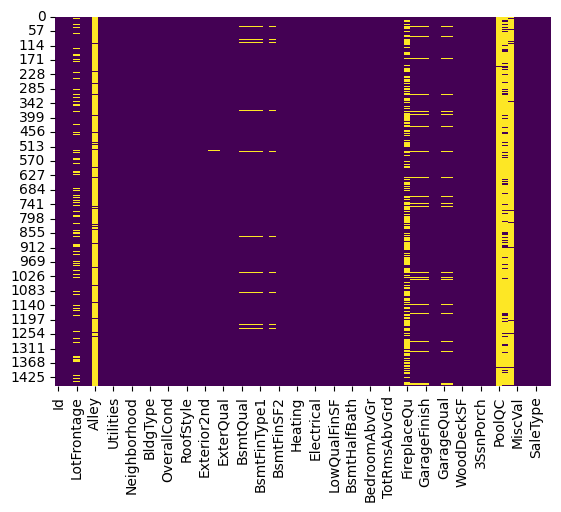

In [19]:
sns.heatmap(dataset.isnull(),cbar=False,cmap='viridis')

In [20]:
dataset = dataset.drop(columns=["Alley", 'LotFrontage', 'PoolQC', 'MiscVal', 'FireplaceQu'])

In [21]:
dataset

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour   
0        1          60       RL     8450   Pave      Reg         Lvl  \
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... 3SsnPorch ScreenPorch PoolArea  Fence   
0       AllPub    Inside       Gtl  ...         0           0        0   None  \
1       AllPub       FR2       Gtl  ...         0           0        0   None   
2       AllPub    Inside       Gtl  ...         0           0        0   None   
3       AllPub    Corner       Gtl  ...         0           0        0   None   
4       AllPub       FR2       Gtl  ...         0           0        0   None   
...        ...       ...       ...  ...       ...         ...      ...    ...   
1455    AllPub    Inside       Gtl  ...         0           0        0   None   
1456    AllPub    Inside       Gtl  ...         0           0        0  MnPrv   
1457    AllPub    Inside       Gtl  ...         0           0        0  GdPrv   
1458    AllPub    Inside       Gtl  ...         0           0        0   None   
1459    AllPub    Inside       Gtl  ...         0           0        0   None   

     MiscFeature  MoSold  YrSold  SaleType  SaleCondition   Price  
0           None       2    2008        WD         Normal  208500  
1           None       5    2007        WD         Normal  181500  
2           None       9    2008        WD         Normal  223500  
3           None       2    2006        WD        Abnorml  140000  
4           None      12    2008        WD         Normal  250000  
...          ...     ...     ...       ...            ...     ...  
1455        None       8    2007        WD         Normal  175000  
1456        None       2    2010        WD         Normal  210000  
1457        Shed       5    2010        WD         Normal  266500  
1458        None       4    2010        WD         Normal  142125  
1459        None       6    2008        WD         Normal  147500  

[1460 rows x 76 columns]

<Axes: >

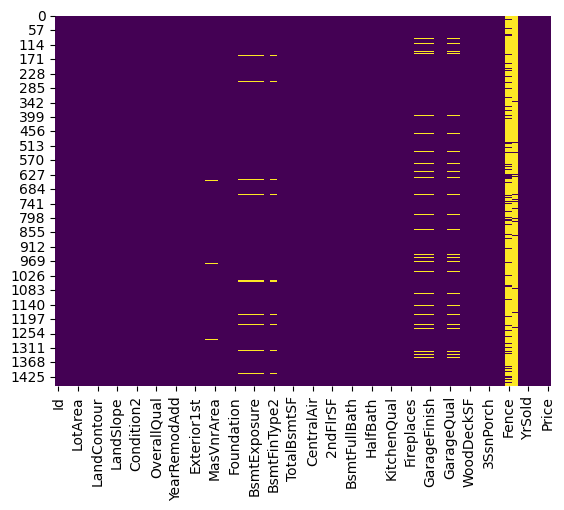

In [22]:
sns.heatmap(dataset.isnull(),cbar=False,cmap='viridis')

In [23]:
dataset = dataset.drop(columns=['Fence', 'BsmtExposure', 'Fireplaces', 'GarageQual',  'Foundation', 'GarageFinish', 'PoolArea', 'GarageCars', 'PavedDrive', 'Functional', 'MasVnrArea', 'BsmtQual', 'BsmtFinSF1'])

In [24]:
dataset

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour   
0        1          60       RL     8450   Pave      Reg         Lvl  \
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... OpenPorchSF EnclosedPorch 3SsnPorch   
0       AllPub    Inside       Gtl  ...          61             0         0  \
1       AllPub       FR2       Gtl  ...           0             0         0   
2       AllPub    Inside       Gtl  ...          42             0         0   
3       AllPub    Corner       Gtl  ...          35           272         0   
4       AllPub       FR2       Gtl  ...          84             0         0   
...        ...       ...       ...  ...         ...           ...       ...   
1455    AllPub    Inside       Gtl  ...          40             0         0   
1456    AllPub    Inside       Gtl  ...           0             0         0   
1457    AllPub    Inside       Gtl  ...          60             0         0   
1458    AllPub    Inside       Gtl  ...           0           112         0   
1459    AllPub    Inside       Gtl  ...          68             0         0   

     ScreenPorch MiscFeature  MoSold  YrSold  SaleType  SaleCondition   Price  
0              0        None       2    2008        WD         Normal  208500  
1              0        None       5    2007        WD         Normal  181500  
2              0        None       9    2008        WD         Normal  223500  
3              0        None       2    2006        WD        Abnorml  140000  
4              0        None      12    2008        WD         Normal  250000  
...          ...         ...     ...     ...       ...            ...     ...  
1455           0        None       8    2007        WD         Normal  175000  
1456           0        None       2    2010        WD         Normal  210000  
1457           0        Shed       5    2010        WD         Normal  266500  
1458           0        None       4    2010        WD         Normal  142125  
1459           0        None       6    2008        WD         Normal  147500  

[1460 rows x 63 columns]

<Axes: >

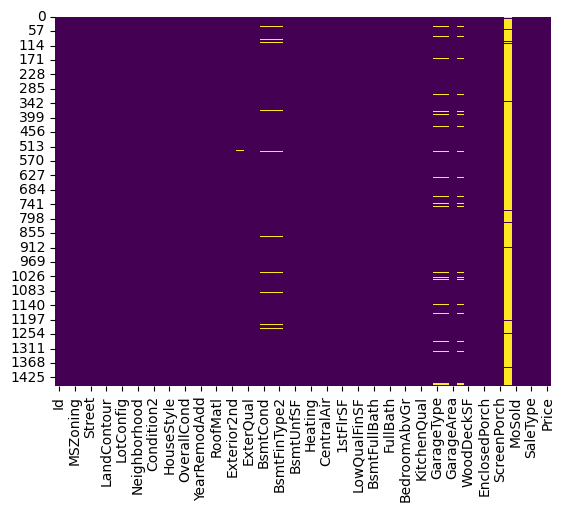

In [25]:
sns.heatmap(dataset.isnull(),cbar=False,cmap='viridis')

In [26]:
dataset = dataset.dropna(axis=1)

In [27]:
dataset

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour   
0        1          60       RL     8450   Pave      Reg         Lvl  \
1        2          20       RL     9600   Pave      Reg         Lvl   
2        3          60       RL    11250   Pave      IR1         Lvl   
3        4          70       RL     9550   Pave      IR1         Lvl   
4        5          60       RL    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60       RL     7917   Pave      Reg         Lvl   
1456  1457          20       RL    13175   Pave      Reg         Lvl   
1457  1458          70       RL     9042   Pave      Reg         Lvl   
1458  1459          20       RL     9717   Pave      Reg         Lvl   
1459  1460          20       RL     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... WoodDeckSF OpenPorchSF EnclosedPorch   
0       AllPub    Inside       Gtl  ...          0          61             0  \
1       AllPub       FR2       Gtl  ...        298           0             0   
2       AllPub    Inside       Gtl  ...          0          42             0   
3       AllPub    Corner       Gtl  ...          0          35           272   
4       AllPub       FR2       Gtl  ...        192          84             0   
...        ...       ...       ...  ...        ...         ...           ...   
1455    AllPub    Inside       Gtl  ...          0          40             0   
1456    AllPub    Inside       Gtl  ...        349           0             0   
1457    AllPub    Inside       Gtl  ...          0          60             0   
1458    AllPub    Inside       Gtl  ...        366           0           112   
1459    AllPub    Inside       Gtl  ...        736          68             0   

     3SsnPorch ScreenPorch  MoSold  YrSold  SaleType  SaleCondition   Price  
0            0           0       2    2008        WD         Normal  208500  
1            0           0       5    2007        WD         Normal  181500  
2            0           0       9    2008        WD         Normal  223500  
3            0           0       2    2006        WD        Abnorml  140000  
4            0           0      12    2008        WD         Normal  250000  
...        ...         ...     ...     ...       ...            ...     ...  
1455         0           0       8    2007        WD         Normal  175000  
1456         0           0       2    2010        WD         Normal  210000  
1457         0           0       5    2010        WD         Normal  266500  
1458         0           0       4    2010        WD         Normal  142125  
1459         0           0       6    2008        WD         Normal  147500  

[1460 rows x 54 columns]

<Axes: >

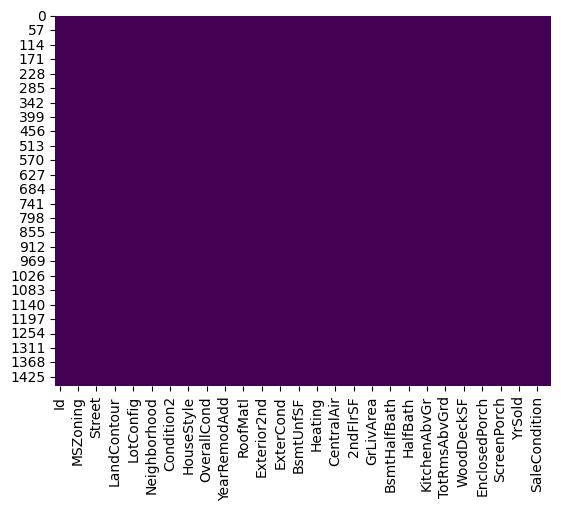

In [28]:
sns.heatmap(dataset.isnull(),cbar=False,cmap='viridis')

In [29]:
dataset.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
ExterQual        0
ExterCond        0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
MoSold           0
YrSold           0
SaleType         0
SaleConditio

# Exploratory Data Analysis

In [30]:
dataset.isnull()

Id  MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour   
0     False       False     False    False   False     False        False  \
1     False       False     False    False   False     False        False   
2     False       False     False    False   False     False        False   
3     False       False     False    False   False     False        False   
4     False       False     False    False   False     False        False   
...     ...         ...       ...      ...     ...       ...          ...   
1455  False       False     False    False   False     False        False   
1456  False       False     False    False   False     False        False   
1457  False       False     False    False   False     False        False   
1458  False       False     False    False   False     False        False   
1459  False       False     False    False   False     False        False   

      Utilities  LotConfig  LandSlope  ...  WoodDeckSF  OpenPorchSF   
0         False      False      False  ...       False        False  \
1         False      False      False  ...       False        False   
2         False      False      False  ...       False        False   
3         False      False      False  ...       False        False   
4         False      False      False  ...       False        False   
...         ...        ...        ...  ...         ...          ...   
1455      False      False      False  ...       False        False   
1456      False      False      False  ...       False        False   
1457      False      False      False  ...       False        False   
1458      False      False      False  ...       False        False   
1459      False      False      False  ...       False        False   

      EnclosedPorch  3SsnPorch  ScreenPorch  MoSold  YrSold  SaleType   
0             False      False        False   False   False     False  \
1             False      False        False   False   False     False   
2             False      False        False   False   False     False   
3             False      False        False   False   False     False   
4             False      False        False   False   False     False   
...             ...        ...          ...     ...     ...       ...   
1455          False      False        False   False   False     False   
1456          False      False        False   False   False     False   
1457          False      False        False   False   False     False   
1458          False      False        False   False   False     False   
1459          False      False        False   False   False     False   

      SaleCondition  Price  
0             False  False  
1             False  False  
2             False  False  
3             False  False  
4             False  False  
...             ...    ...  
1455          False  False  
1456          False  False  
1457          False  False  
1458          False  False  
1459          False  False  

[1460 rows x 54 columns]

In [31]:
dataset.describe()

Id   MSSubClass        LotArea  OverallQual  OverallCond   
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000  \
mean    730.500000    56.897260   10516.828082     6.099315     5.575342   
std     421.610009    42.300571    9981.264932     1.382997     1.112799   
min       1.000000    20.000000    1300.000000     1.000000     1.000000   
25%     365.750000    20.000000    7553.500000     5.000000     5.000000   
50%     730.500000    50.000000    9478.500000     6.000000     5.000000   
75%    1095.250000    70.000000   11601.500000     7.000000     6.000000   
max    1460.000000   190.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  ...   
count  1460.000000   1460.000000  1460.000000  1460.000000  1460.000000  ...  \
mean   1971.267808   1984.865753    46.549315   567.240411  1057.429452  ...   
std      30.202904     20.645407   161.319273   441.866955   438.705324  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000   223.000000   795.750000  ...   
50%    1973.000000   1994.000000     0.000000   477.500000   991.500000  ...   
75%    2000.000000   2004.000000     0.000000   808.000000  1298.250000  ...   
max    2010.000000   2010.000000  1474.000000  2336.000000  6110.000000  ...   

       TotRmsAbvGrd   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch   
count   1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  \
mean       6.517808   472.980137    94.244521    46.660274      21.954110   
std        1.625393   213.804841   125.338794    66.256028      61.119149   
min        2.000000     0.000000     0.000000     0.000000       0.000000   
25%        5.000000   334.500000     0.000000     0.000000       0.000000   
50%        6.000000   480.000000     0.000000    25.000000       0.000000   
75%        7.000000   576.000000   168.000000    68.000000       0.000000   
max       14.000000  1418.000000   857.000000   547.000000     552.000000   

         3SsnPorch  ScreenPorch       MoSold       YrSold          Price  
count  1460.000000  1460.000000  1460.000000  1460.000000    1460.000000  
mean      3.409589    15.060959     6.321918  2007.815753  180921.195890  
std      29.317331    55.757415     2.703626     1.328095   79442.502883  
min       0.000000     0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000     0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000     0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000     0.000000     8.000000  2009.000000  214000.000000  
max     508.000000   480.000000    12.000000  2010.000000  755000.000000  

[8 rows x 30 columns]

In [32]:
dataset.corr()

ValueError: could not convert string to float: 'RL'

In [33]:
dataset = dataset.replace('RL', np.nan)

In [34]:
dataset

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour   
0        1          60      NaN     8450   Pave      Reg         Lvl  \
1        2          20      NaN     9600   Pave      Reg         Lvl   
2        3          60      NaN    11250   Pave      IR1         Lvl   
3        4          70      NaN     9550   Pave      IR1         Lvl   
4        5          60      NaN    14260   Pave      IR1         Lvl   
...    ...         ...      ...      ...    ...      ...         ...   
1455  1456          60      NaN     7917   Pave      Reg         Lvl   
1456  1457          20      NaN    13175   Pave      Reg         Lvl   
1457  1458          70      NaN     9042   Pave      Reg         Lvl   
1458  1459          20      NaN     9717   Pave      Reg         Lvl   
1459  1460          20      NaN     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... WoodDeckSF OpenPorchSF EnclosedPorch   
0       AllPub    Inside       Gtl  ...          0          61             0  \
1       AllPub       FR2       Gtl  ...        298           0             0   
2       AllPub    Inside       Gtl  ...          0          42             0   
3       AllPub    Corner       Gtl  ...          0          35           272   
4       AllPub       FR2       Gtl  ...        192          84             0   
...        ...       ...       ...  ...        ...         ...           ...   
1455    AllPub    Inside       Gtl  ...          0          40             0   
1456    AllPub    Inside       Gtl  ...        349           0             0   
1457    AllPub    Inside       Gtl  ...          0          60             0   
1458    AllPub    Inside       Gtl  ...        366           0           112   
1459    AllPub    Inside       Gtl  ...        736          68             0   

     3SsnPorch ScreenPorch  MoSold  YrSold  SaleType  SaleCondition   Price  
0            0           0       2    2008        WD         Normal  208500  
1            0           0       5    2007        WD         Normal  181500  
2            0           0       9    2008        WD         Normal  223500  
3            0           0       2    2006        WD        Abnorml  140000  
4            0           0      12    2008        WD         Normal  250000  
...        ...         ...     ...     ...       ...            ...     ...  
1455         0           0       8    2007        WD         Normal  175000  
1456         0           0       2    2010        WD         Normal  210000  
1457         0           0       5    2010        WD         Normal  266500  
1458         0           0       4    2010        WD         Normal  142125  
1459         0           0       6    2008        WD         Normal  147500  

[1460 rows x 54 columns]

In [35]:
dataset.isnull().sum()

Id                  0
MSSubClass          0
MSZoning         1151
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
ExterQual           0
ExterCond           0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
GarageArea          0
WoodDeckSF          0
OpenPorchS

<Axes: >

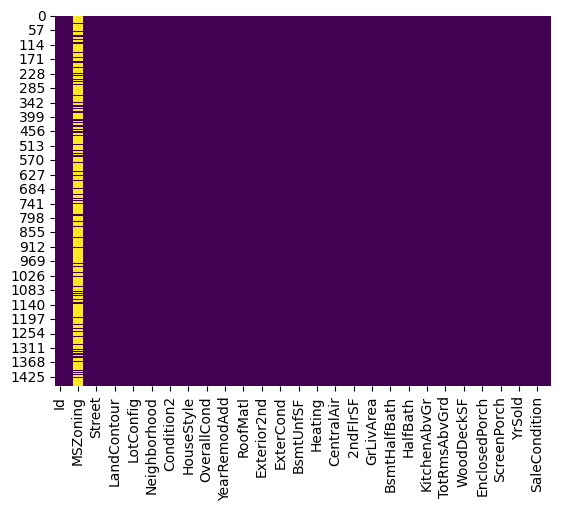

In [36]:
sns.heatmap(dataset.isnull(),cbar=False,cmap='viridis')

In [37]:
dataset = dataset.drop(columns=['MSZoning'])

In [38]:
dataset

Id  MSSubClass  LotArea Street LotShape LandContour Utilities   
0        1          60     8450   Pave      Reg         Lvl    AllPub  \
1        2          20     9600   Pave      Reg         Lvl    AllPub   
2        3          60    11250   Pave      IR1         Lvl    AllPub   
3        4          70     9550   Pave      IR1         Lvl    AllPub   
4        5          60    14260   Pave      IR1         Lvl    AllPub   
...    ...         ...      ...    ...      ...         ...       ...   
1455  1456          60     7917   Pave      Reg         Lvl    AllPub   
1456  1457          20    13175   Pave      Reg         Lvl    AllPub   
1457  1458          70     9042   Pave      Reg         Lvl    AllPub   
1458  1459          20     9717   Pave      Reg         Lvl    AllPub   
1459  1460          20     9937   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... WoodDeckSF OpenPorchSF   
0       Inside       Gtl      CollgCr  ...          0          61  \
1          FR2       Gtl      Veenker  ...        298           0   
2       Inside       Gtl      CollgCr  ...          0          42   
3       Corner       Gtl      Crawfor  ...          0          35   
4          FR2       Gtl      NoRidge  ...        192          84   
...        ...       ...          ...  ...        ...         ...   
1455    Inside       Gtl      Gilbert  ...          0          40   
1456    Inside       Gtl       NWAmes  ...        349           0   
1457    Inside       Gtl      Crawfor  ...          0          60   
1458    Inside       Gtl        NAmes  ...        366           0   
1459    Inside       Gtl      Edwards  ...        736          68   

     EnclosedPorch 3SsnPorch  ScreenPorch  MoSold  YrSold  SaleType   
0                0         0            0       2    2008        WD  \
1                0         0            0       5    2007        WD   
2                0         0            0       9    2008        WD   
3              272         0            0       2    2006        WD   
4                0         0            0      12    2008        WD   
...            ...       ...          ...     ...     ...       ...   
1455             0         0            0       8    2007        WD   
1456             0         0            0       2    2010        WD   
1457             0         0            0       5    2010        WD   
1458           112         0            0       4    2010        WD   
1459             0         0            0       6    2008        WD   

     SaleCondition   Price  
0           Normal  208500  
1           Normal  181500  
2           Normal  223500  
3          Abnorml  140000  
4           Normal  250000  
...            ...     ...  
1455        Normal  175000  
1456        Normal  210000  
1457        Normal  266500  
1458        Normal  142125  
1459        Normal  147500  

[1460 rows x 53 columns]

In [39]:
dataset.corr()

ValueError: could not convert string to float: 'Pave'

In [40]:
dataset = dataset.applymap(lambda x: np.nan if isinstance(x, str) else x) #To replace all string data in a DataFrame with np.nan (missing value)

In [41]:
dataset

Id  MSSubClass  LotArea  Street  LotShape  LandContour  Utilities   
0        1          60     8450     NaN       NaN          NaN        NaN  \
1        2          20     9600     NaN       NaN          NaN        NaN   
2        3          60    11250     NaN       NaN          NaN        NaN   
3        4          70     9550     NaN       NaN          NaN        NaN   
4        5          60    14260     NaN       NaN          NaN        NaN   
...    ...         ...      ...     ...       ...          ...        ...   
1455  1456          60     7917     NaN       NaN          NaN        NaN   
1456  1457          20    13175     NaN       NaN          NaN        NaN   
1457  1458          70     9042     NaN       NaN          NaN        NaN   
1458  1459          20     9717     NaN       NaN          NaN        NaN   
1459  1460          20     9937     NaN       NaN          NaN        NaN   

      LotConfig  LandSlope  Neighborhood  ...  WoodDeckSF  OpenPorchSF   
0           NaN        NaN           NaN  ...           0           61  \
1           NaN        NaN           NaN  ...         298            0   
2           NaN        NaN           NaN  ...           0           42   
3           NaN        NaN           NaN  ...           0           35   
4           NaN        NaN           NaN  ...         192           84   
...         ...        ...           ...  ...         ...          ...   
1455        NaN        NaN           NaN  ...           0           40   
1456        NaN        NaN           NaN  ...         349            0   
1457        NaN        NaN           NaN  ...           0           60   
1458        NaN        NaN           NaN  ...         366            0   
1459        NaN        NaN           NaN  ...         736           68   

      EnclosedPorch  3SsnPorch  ScreenPorch  MoSold  YrSold  SaleType   
0                 0          0            0       2    2008       NaN  \
1                 0          0            0       5    2007       NaN   
2                 0          0            0       9    2008       NaN   
3               272          0            0       2    2006       NaN   
4                 0          0            0      12    2008       NaN   
...             ...        ...          ...     ...     ...       ...   
1455              0          0            0       8    2007       NaN   
1456              0          0            0       2    2010       NaN   
1457              0          0            0       5    2010       NaN   
1458            112          0            0       4    2010       NaN   
1459              0          0            0       6    2008       NaN   

      SaleCondition   Price  
0               NaN  208500  
1               NaN  181500  
2               NaN  223500  
3               NaN  140000  
4               NaN  250000  
...             ...     ...  
1455            NaN  175000  
1456            NaN  210000  
1457            NaN  266500  
1458            NaN  142125  
1459            NaN  147500  

[1460 rows x 53 columns]

In [42]:
dataset.isnull().sum()

Id                  0
MSSubClass          0
LotArea             0
Street           1460
LotShape         1460
LandContour      1460
Utilities        1460
LotConfig        1460
LandSlope        1460
Neighborhood     1460
Condition1       1460
Condition2       1460
BldgType         1460
HouseStyle       1460
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle        1460
RoofMatl         1460
Exterior1st      1460
Exterior2nd      1460
ExterQual        1460
ExterCond        1460
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating          1460
HeatingQC        1460
CentralAir       1460
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual      1460
TotRmsAbvGrd        0
GarageArea          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPo

In [43]:
dataset = dataset.dropna(axis=1)

In [44]:
dataset

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt   
0        1          60     8450            7            5       2003  \
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
...    ...         ...      ...          ...          ...        ...   
1455  1456          60     7917            6            5       1999   
1456  1457          20    13175            6            6       1978   
1457  1458          70     9042            7            9       1941   
1458  1459          20     9717            5            6       1950   
1459  1460          20     9937            5            6       1965   

      YearRemodAdd  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  TotRmsAbvGrd   
0             2003           0        150          856  ...             8  \
1             1976           0        284         1262  ...             6   
2             2002           0        434          920  ...             6   
3             1970           0        540          756  ...             7   
4             2000           0        490         1145  ...             9   
...            ...         ...        ...          ...  ...           ...   
1455          2000           0        953          953  ...             7   
1456          1988         163        589         1542  ...             7   
1457          2006           0        877         1152  ...             9   
1458          1996        1029          0         1078  ...             5   
1459          1965         290        136         1256  ...             6   

      GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch   
0            548           0           61              0          0  \
1            460         298            0              0          0   
2            608           0           42              0          0   
3            642           0           35            272          0   
4            836         192           84              0          0   
...          ...         ...          ...            ...        ...   
1455         460           0           40              0          0   
1456         500         349            0              0          0   
1457         252           0           60              0          0   
1458         240         366            0            112          0   
1459         276         736           68              0          0   

      ScreenPorch  MoSold  YrSold   Price  
0               0       2    2008  208500  
1               0       5    2007  181500  
2               0       9    2008  223500  
3               0       2    2006  140000  
4               0      12    2008  250000  
...           ...     ...     ...     ...  
1455            0       8    2007  175000  
1456            0       2    2010  210000  
1457            0       5    2010  266500  
1458            0       4    2010  142125  
1459            0       6    2008  147500  

[1460 rows x 30 columns]

In [45]:
dataset.isnull().sum()

Id               0
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
MoSold           0
YrSold           0
Price            0
dtype: int64

In [46]:
dataset.corr()

Id  MSSubClass   LotArea  OverallQual  OverallCond   
Id             1.000000    0.011156 -0.033226    -0.028365     0.012609  \
MSSubClass     0.011156    1.000000 -0.139781     0.032628    -0.059316   
LotArea       -0.033226   -0.139781  1.000000     0.105806    -0.005636   
OverallQual   -0.028365    0.032628  0.105806     1.000000    -0.091932   
OverallCond    0.012609   -0.059316 -0.005636    -0.091932     1.000000   
YearBuilt     -0.012713    0.027850  0.014228     0.572323    -0.375983   
YearRemodAdd  -0.021998    0.040581  0.013788     0.550684     0.073741   
BsmtFinSF2    -0.005968   -0.065649  0.111170    -0.059119     0.040229   
BsmtUnfSF     -0.007940   -0.140759 -0.002618     0.308159    -0.136841   
TotalBsmtSF   -0.015415   -0.238518  0.260833     0.537808    -0.171098   
1stFlrSF       0.010496   -0.251758  0.299475     0.476224    -0.144203   
2ndFlrSF       0.005590    0.307886  0.050986     0.295493     0.028942   
LowQualFinSF  -0.044230    0.046474  0.004779    -0.030429     0.025494   
GrLivArea      0.008273    0.074853  0.263116     0.593007    -0.079686   
BsmtFullBath   0.002289    0.003491  0.158155     0.111098    -0.054942   
BsmtHalfBath  -0.020155   -0.002333  0.048046    -0.040150     0.117821   
FullBath       0.005587    0.131608  0.126031     0.550600    -0.194149   
HalfBath       0.006784    0.177354  0.014259     0.273458    -0.060769   
BedroomAbvGr   0.037719   -0.023438  0.119690     0.101676     0.012980   
KitchenAbvGr   0.002951    0.281721 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd   0.027239    0.040380  0.190015     0.427452    -0.057583   
GarageArea     0.017634   -0.098672  0.180403     0.562022    -0.151521   
WoodDeckSF    -0.029643   -0.012579  0.171698     0.238923    -0.003334   
OpenPorchSF   -0.000477   -0.006100  0.084774     0.308819    -0.032589   
EnclosedPorch  0.002889   -0.012037 -0.018340    -0.113937     0.070356   
3SsnPorch     -0.046635   -0.043825  0.020423     0.030371     0.025504   
ScreenPorch    0.001330   -0.026030  0.043160     0.064886     0.054811   
MoSold         0.021172   -0.013585  0.001205     0.070815    -0.003511   
YrSold         0.000712   -0.021407 -0.014261    -0.027347     0.043950   
Price         -0.021917   -0.084284  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
Id             -0.012713     -0.021998   -0.005968  -0.007940    -0.015415  \
MSSubClass      0.027850      0.040581   -0.065649  -0.140759    -0.238518   
LotArea         0.014228      0.013788    0.111170  -0.002618     0.260833   
OverallQual     0.572323      0.550684   -0.059119   0.308159     0.537808   
OverallCond    -0.375983      0.073741    0.040229  -0.136841    -0.171098   
YearBuilt       1.000000      0.592855   -0.049107   0.149040     0.391452   
YearRemodAdd    0.592855      1.000000   -0.067759   0.181133     0.291066   
BsmtFinSF2     -0.049107     -0.067759    1.000000  -0.209294     0.104810   
BsmtUnfSF       0.149040      0.181133   -0.209294   1.000000     0.415360   
TotalBsmtSF     0.391452      0.291066    0.104810   0.415360     1.000000   
1stFlrSF        0.281986      0.240379    0.097117   0.317987     0.819530   
2ndFlrSF        0.010308      0.140024   -0.099260   0.004469    -0.174512   
LowQualFinSF   -0.183784     -0.062419    0.014807   0.028167    -0.033245   
GrLivArea       0.199010      0.287389   -0.009640   0.240257     0.454868   
BsmtFullBath    0.187599      0.119470    0.158678  -0.422900     0.307351   
BsmtHalfBath   -0.038162     -0.012337    0.070948  -0.095804    -0.000315   
FullBath        0.468271      0.439046   -0.076444   0.288886     0.323722   
HalfBath        0.242656      0.183331   -0.032148  -0.041118    -0.048804   
BedroomAbvGr   -0.070651     -0.040581   -0.015728   0.166643     0.050450   
KitchenAbvGr   -0.174800     -0.149598   -0.040751   0.030086    -0.068901   
TotRmsAbvGrd    0.095589      0.191740   -0.035227   0.25

In [49]:
sns.pairplot(dataset)

# Analysis of Correlated features

In [48]:
dataset.corr()

Id  MSSubClass   LotArea  OverallQual  OverallCond   
Id             1.000000    0.011156 -0.033226    -0.028365     0.012609  \
MSSubClass     0.011156    1.000000 -0.139781     0.032628    -0.059316   
LotArea       -0.033226   -0.139781  1.000000     0.105806    -0.005636   
OverallQual   -0.028365    0.032628  0.105806     1.000000    -0.091932   
OverallCond    0.012609   -0.059316 -0.005636    -0.091932     1.000000   
YearBuilt     -0.012713    0.027850  0.014228     0.572323    -0.375983   
YearRemodAdd  -0.021998    0.040581  0.013788     0.550684     0.073741   
BsmtFinSF2    -0.005968   -0.065649  0.111170    -0.059119     0.040229   
BsmtUnfSF     -0.007940   -0.140759 -0.002618     0.308159    -0.136841   
TotalBsmtSF   -0.015415   -0.238518  0.260833     0.537808    -0.171098   
1stFlrSF       0.010496   -0.251758  0.299475     0.476224    -0.144203   
2ndFlrSF       0.005590    0.307886  0.050986     0.295493     0.028942   
LowQualFinSF  -0.044230    0.046474  0.004779    -0.030429     0.025494   
GrLivArea      0.008273    0.074853  0.263116     0.593007    -0.079686   
BsmtFullBath   0.002289    0.003491  0.158155     0.111098    -0.054942   
BsmtHalfBath  -0.020155   -0.002333  0.048046    -0.040150     0.117821   
FullBath       0.005587    0.131608  0.126031     0.550600    -0.194149   
HalfBath       0.006784    0.177354  0.014259     0.273458    -0.060769   
BedroomAbvGr   0.037719   -0.023438  0.119690     0.101676     0.012980   
KitchenAbvGr   0.002951    0.281721 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd   0.027239    0.040380  0.190015     0.427452    -0.057583   
GarageArea     0.017634   -0.098672  0.180403     0.562022    -0.151521   
WoodDeckSF    -0.029643   -0.012579  0.171698     0.238923    -0.003334   
OpenPorchSF   -0.000477   -0.006100  0.084774     0.308819    -0.032589   
EnclosedPorch  0.002889   -0.012037 -0.018340    -0.113937     0.070356   
3SsnPorch     -0.046635   -0.043825  0.020423     0.030371     0.025504   
ScreenPorch    0.001330   -0.026030  0.043160     0.064886     0.054811   
MoSold         0.021172   -0.013585  0.001205     0.070815    -0.003511   
YrSold         0.000712   -0.021407 -0.014261    -0.027347     0.043950   
Price         -0.021917   -0.084284  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF   
Id             -0.012713     -0.021998   -0.005968  -0.007940    -0.015415  \
MSSubClass      0.027850      0.040581   -0.065649  -0.140759    -0.238518   
LotArea         0.014228      0.013788    0.111170  -0.002618     0.260833   
OverallQual     0.572323      0.550684   -0.059119   0.308159     0.537808   
OverallCond    -0.375983      0.073741    0.040229  -0.136841    -0.171098   
YearBuilt       1.000000      0.592855   -0.049107   0.149040     0.391452   
YearRemodAdd    0.592855      1.000000   -0.067759   0.181133     0.291066   
BsmtFinSF2     -0.049107     -0.067759    1.000000  -0.209294     0.104810   
BsmtUnfSF       0.149040      0.181133   -0.209294   1.000000     0.415360   
TotalBsmtSF     0.391452      0.291066    0.104810   0.415360     1.000000   
1stFlrSF        0.281986      0.240379    0.097117   0.317987     0.819530   
2ndFlrSF        0.010308      0.140024   -0.099260   0.004469    -0.174512   
LowQualFinSF   -0.183784     -0.062419    0.014807   0.028167    -0.033245   
GrLivArea       0.199010      0.287389   -0.009640   0.240257     0.454868   
BsmtFullBath    0.187599      0.119470    0.158678  -0.422900     0.307351   
BsmtHalfBath   -0.038162     -0.012337    0.070948  -0.095804    -0.000315   
FullBath        0.468271      0.439046   -0.076444   0.288886     0.323722   
HalfBath        0.242656      0.183331   -0.032148  -0.041118    -0.048804   
BedroomAbvGr   -0.070651     -0.040581   -0.015728   0.166643     0.050450   
KitchenAbvGr   -0.174800     -0.149598   -0.040751   0.030086    -0.068901   
TotRmsAbvGrd    0.095589      0.191740   -0.035227   0.25

Text(0, 0.5, 'Price')

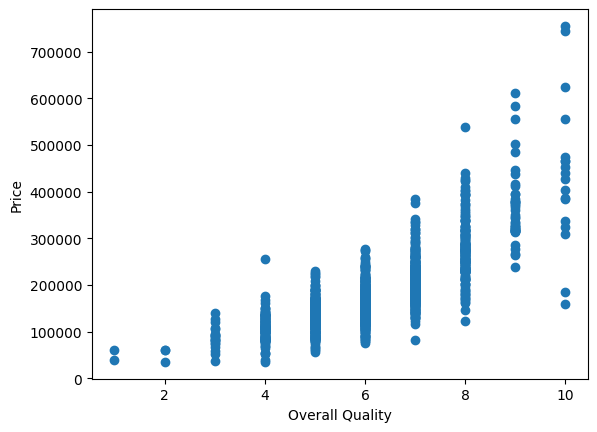

In [50]:
plt.scatter(dataset['OverallQual'], dataset['Price'])
plt.xlabel('Overall Quality')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

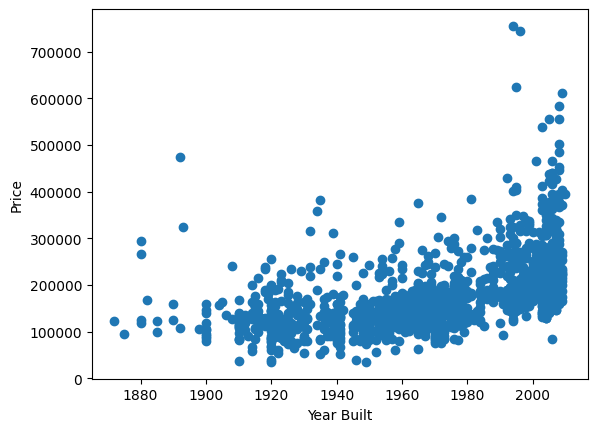

In [51]:
plt.scatter(dataset['YearBuilt'], dataset['Price'])
plt.xlabel('Year Built')
plt.ylabel('Price')

Text(0, 0.5, 'Price')

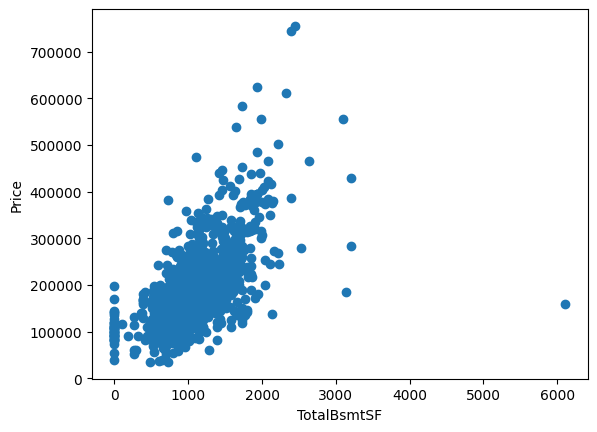

In [52]:
plt.scatter(dataset['TotalBsmtSF'], dataset['Price'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('Price')

<Axes: xlabel='OverallQual', ylabel='Price'>

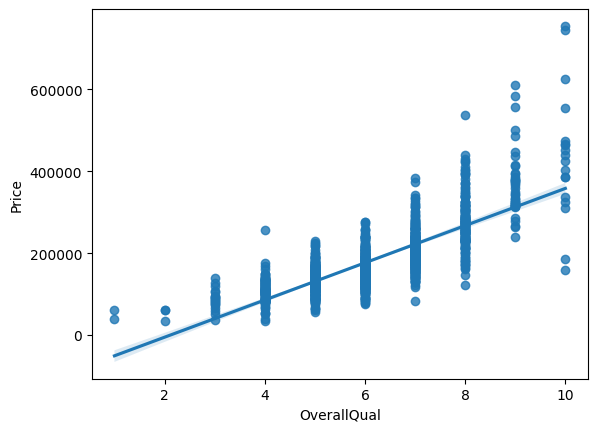

In [53]:
sns.regplot(x='OverallQual', y='Price', data=dataset)

# Train Test Split

In [54]:
x = dataset.iloc[:, :-1] #independent features
y = dataset.iloc[:, -1] #dependent features

In [55]:
x

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt   
0        1          60     8450            7            5       2003  \
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
...    ...         ...      ...          ...          ...        ...   
1455  1456          60     7917            6            5       1999   
1456  1457          20    13175            6            6       1978   
1457  1458          70     9042            7            9       1941   
1458  1459          20     9717            5            6       1950   
1459  1460          20     9937            5            6       1965   

      YearRemodAdd  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  KitchenAbvGr   
0             2003           0        150          856  ...             1  \
1             1976           0        284         1262  ...             1   
2             2002           0        434          920  ...             1   
3             1970           0        540          756  ...             1   
4             2000           0        490         1145  ...             1   
...            ...         ...        ...          ...  ...           ...   
1455          2000           0        953          953  ...             1   
1456          1988         163        589         1542  ...             1   
1457          2006           0        877         1152  ...             1   
1458          1996        1029          0         1078  ...             1   
1459          1965         290        136         1256  ...             1   

      TotRmsAbvGrd  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch   
0                8         548           0           61              0  \
1                6         460         298            0              0   
2                6         608           0           42              0   
3                7         642           0           35            272   
4                9         836         192           84              0   
...            ...         ...         ...          ...            ...   
1455             7         460           0           40              0   
1456             7         500         349            0              0   
1457             9         252           0           60              0   
1458             5         240         366            0            112   
1459             6         276         736           68              0   

      3SsnPorch  ScreenPorch  MoSold  YrSold  
0             0            0       2    2008  
1             0            0       5    2007  
2             0            0       9    2008  
3             0            0       2    2006  
4             0            0      12    2008  
...         ...          ...     ...     ...  
1455          0            0       8    2007  
1456          0            0       2    2010  
1457          0            0       5    2010  
1458          0            0       4    2010  
1459          0            0       6    2008  

[1460 rows x 29 columns]

In [56]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: Price, Length: 1460, dtype: int64

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [58]:
x_train

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt   
907    908          50    11500            7            7       1936  \
782    783          20    16285            7            5       2001   
952    953          85     7200            5            8       1972   
620    621          30     8248            3            3       1914   
669    670          30    11600            4            5       1922   
...    ...         ...      ...          ...          ...        ...   
1095  1096          20     9317            6            5       2006   
1130  1131          50     7804            4            3       1928   
1294  1295          20     8172            5            7       1955   
860    861          50     7642            7            8       1918   
1126  1127         120     3684            7            5       2007   

      YearRemodAdd  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  KitchenAbvGr   
907           1987           0        794         1017  ...             1  \
782           2002           0       1413         1413  ...             1   
952           2003           0        108          768  ...             1   
620           1950           0        823          864  ...             1   
669           1950           0        700          700  ...             1   
...            ...         ...        ...          ...  ...           ...   
1095          2006           0       1290         1314  ...             1   
1130          1950           0        500         1122  ...             1   
1294          1990           0        697          864  ...             1   
860           1998           0        912          912  ...             1   
1126          2007           0       1373         1373  ...             1   

      TotRmsAbvGrd  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch   
907              6         180           0            0              0  \
782              6         605           0           33              0   
952              5         396         192            0              0   
620              5           0           0            0            100   
669              5         252           0            0             67   
...            ...         ...         ...          ...            ...   
1095             6         440           0           22              0   
1130             7         576         431           44              0   
1294             5         572           0            0              0   
860              7         216           0          240              0   
1126             7         660         143           20              0   

      3SsnPorch  ScreenPorch  MoSold  YrSold  
907           0          322       6    2006  
782           0            0       6    2009  
952           0            0       4    2009  
620           0            0       9    2008  
669           0            0       7    2006  
...         ...          ...     ...     ...  
1095          0            0       3    2007  
1130          0            0      12    2009  
1294          0            0       4    2006  
860           0            0       6    2007  
1126          0            0       6    2009  

[1314 rows x 29 columns]

In [59]:
x_test

Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt   
892    893          20     8414            6            8       1963  \
1105  1106          60    12256            8            5       1994   
413    414          30     8960            5            6       1927   
522    523          50     5000            6            7       1947   
1036  1037          20    12898            9            5       2007   
...    ...         ...      ...          ...          ...        ...   
526    527          20    13300            5            7       1956   
101    102          60     9206            6            5       1985   
1092  1093          50     8400            6            5       1925   
411    412         190    34650            5            5       1955   
1392  1393          85     7838            5            5       1967   

      YearRemodAdd  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  ...  KitchenAbvGr   
892           2003           0        396         1059  ...             1  \
1105          1995           0        431         1463  ...             1   
413           1950           0       1008         1008  ...             1   
522           1950           0        605         1004  ...             1   
1036          2008           0        598         1620  ...             1   
...            ...         ...        ...          ...  ...           ...   
526           2000           0        551          928  ...             1   
101           1985           0        741          741  ...             1   
1092          1950           0        758         1181  ...             1   
411           1955           0          0         1056  ...             1   
1392          1967           0         95          864  ...             1   

      TotRmsAbvGrd  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch   
892              6         264         192            0              0  \
1105             9         712         186           32              0   
413              5         360           0            0            130   
522              7         420           0           24             36   
1036             6         912         228            0              0   
...            ...         ...         ...          ...            ...   
526              4         252         261            0            156   
101              7         476         192           46              0   
1092             7         576         342            0            128   
411              5         572         264            0              0   
1392             6         288         175          144              0   

      3SsnPorch  ScreenPorch  MoSold  YrSold  
892           0            0       2    2006  
1105          0            0       4    2010  
413           0            0       3    2010  
522           0            0      10    2006  
1036          0            0       9    2009  
...         ...          ...     ...     ...  
526           0            0       6    2007  
101           0            0       6    2010  
1092          0            0       6    2008  
411           0            0       1    2006  
1392          0            0      12    2006  

[146 rows x 29 columns]

In [60]:
y_train

907     250000
782     187100
952     133900
620      67000
669     137500
         ...  
1095    176432
1130    135000
1294    115000
860     189950
1126    174000
Name: Price, Length: 1314, dtype: int64

In [61]:
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
526     132000
101     178000
1092    136500
411     145000
1392    123000
Name: Price, Length: 146, dtype: int64

# Standardizing the Dataset

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #values of features in dataset are calculated using different units so we need to make it one standard 

In [63]:
x_train = scaler.fit_transform(x_train) #transforming your dataset....train and not test...test will be use for model

In [64]:
x_test = scaler.transform(x_test)

In [65]:
import pickle
pickle.dump(scaler, open('scaling.pkl', 'wb'))

In [66]:
x_train

array([[ 0.41397401, -0.17488316,  0.08455725, ...,  5.45003918,
        -0.12824988, -1.36406826],
       [ 0.11811231, -0.88086311,  0.54377374, ..., -0.27111057,
        -0.12824988,  0.88484729],
       [ 0.52048422,  0.64876011, -0.32811379, ..., -0.27111057,
        -0.87226902,  0.88484729],
       ...,
       [ 1.32996183, -0.88086311, -0.23483094, ..., -0.27111057,
        -0.87226902, -1.36406826],
       [ 0.30273001, -0.17488316, -0.28569505, ..., -0.27111057,
        -0.12824988, -0.61442974],
       [ 0.93232371,  1.47240339, -0.66554435, ..., -0.27111057,
        -0.12824988,  0.88484729]])

In [67]:
x_test

array([[ 0.37847061, -0.88086311, -0.2116062 , ..., -0.27111057,
        -1.61628816, -1.36406826],
       [ 0.88261894,  0.06044349,  0.15711057, ..., -0.27111057,
        -0.87226902,  1.63448581],
       [-0.75527142, -0.64553646, -0.15920658, ..., -0.27111057,
        -1.24427859,  1.63448581],
       ...,
       [ 0.85184933, -0.17488316, -0.21294978, ..., -0.27111057,
        -0.12824988,  0.13520877],
       [-0.76000521,  3.11968993,  2.30626296, ..., -0.27111057,
        -1.98829773, -1.36406826],
       [ 1.56191741,  0.64876011, -0.26688493, ..., -0.27111057,
         2.10380755, -1.36406826]])

# Model Training

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
regression = LinearRegression()

In [70]:
regression.fit(x_train, y_train)

LinearRegression()

In [71]:
print(regression.coef_)
#coefficients indicates to independent features
#eg., for every unit increase in id value there will be -6.15335303e+02 increase in price....negative denotes 6.15335303e+02 price will get decrease

[-6.15335303e+02 -6.85301317e+03  4.66709124e+03  2.61522179e+04
  4.20139327e+03  1.02208273e+04  3.05839317e+03 -2.00629187e+03
 -3.17117253e+03  6.72465707e+03  2.49115447e+16  2.82825383e+16
  3.06657413e+15 -3.36282123e+16  5.64180021e+03  1.08463082e+02
  3.54857171e+03  3.78324464e+02 -7.98359398e+03 -3.52599757e+03
  9.91556685e+03  6.49209381e+03  3.69457937e+03 -8.32463687e+02
  2.08431024e+02  7.58067852e+02  4.18986186e+03  3.15142502e+02
 -1.24872556e+03]


In [72]:
print(regression.intercept_)

180712.2426685164


In [73]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

# Prediction with Test Data

In [74]:
reg_pred=regression.predict(x_test)

In [75]:
reg_pred

array([159817.71405302, 310699.98970676, 102985.96475139, 172026.71990344,
       301630.50916761,  50580.59081538, 218287.55140171, 145966.78210605,
        50643.06732428, 162107.47562211, 157156.97018396, 116628.48363064,
        91284.0787504 , 214755.86177954, 189668.29963151, 143674.76702645,
       210848.11111011, 139610.84977009, 121104.31477847, 237929.62253488,
       182736.81201182, 222072.5673746 , 193273.91780417, 133673.2717047 ,
       220797.68235525, 156237.71991734, 201015.62629582,  81724.99624065,
       182888.47611922, 181493.19664673, 115238.44933865, 269076.25686892,
       241354.60792686,  90875.04165584, 271488.75617169, 166874.90137507,
       152867.11878035, 215535.52930239, 306673.68183857,  92318.32715952,
       126480.67117065, 242380.43650619, 105734.49808788, 298856.94822847,
       128505.92479485, 135382.91779954, 108185.04732176, 135529.46759311,
       362062.68145255, 134853.78741183, 109740.07655293, 217206.75084756,
        93009.24275056, 3

In [76]:
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
526     132000
101     178000
1092    136500
411     145000
1392    123000
Name: Price, Length: 146, dtype: int64

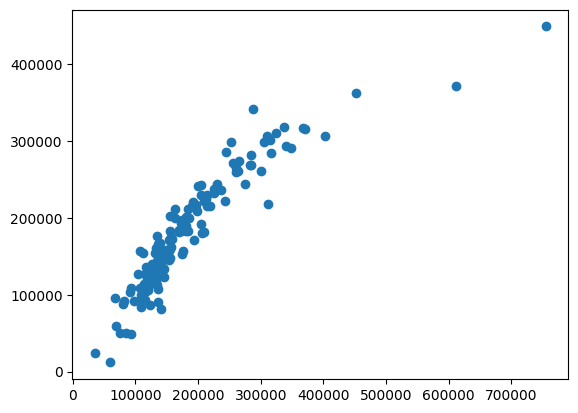

In [77]:
plt.scatter(y_test, reg_pred)

In [78]:
residuals = y_test - reg_pred

In [79]:
residuals

892     -5317.714053
1105    14300.010293
413     12014.035249
522    -13026.719903
1036    13869.490832
            ...     
526      5978.050950
101     -6502.201249
1092   -28914.203103
411     22392.190201
1392     7723.505270
Name: Price, Length: 146, dtype: float64

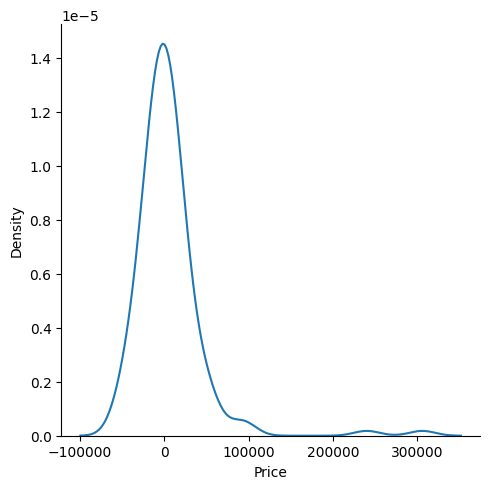

In [80]:
sns.displot(residuals, kind = 'kde')

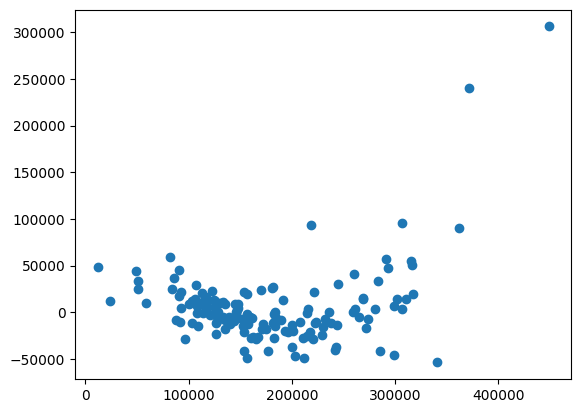

In [81]:
plt.scatter(reg_pred, residuals)

# Performance mertrics

In [82]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, reg_pred))
print(mean_squared_error(y_test, reg_pred)) #Cost Function
print(np.sqrt(mean_squared_error(y_test, reg_pred)))

23101.397801523293
1730586044.1923707
41600.31302998056


In [83]:
#adjusted R square will be always less than R square

In [84]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_pred)
print(score)

0.81058834741959


In [85]:
#adjusted R square 
1 - (1-score)*(len(y_test)-1) / (len(y_test) - x_test.shape[1] - 1)

0.7632354342744875

# New Data Predicition

In [86]:
test1 = x_train[0]

In [87]:
test1

array([ 0.41397401, -0.17488316,  0.08455725,  0.65007143,  1.28299297,
       -1.14967906,  0.10539079, -0.27926896,  0.51082692, -0.09106944,
       -0.3740167 ,  1.57319102, -0.11532671,  1.03552468, -0.81466191,
       -0.24112529, -1.03617753,  1.22509783,  0.15099117, -0.21588629,
       -0.33702514, -1.39184244, -0.74860564, -0.70967143, -0.35788726,
       -0.12217499,  5.45003918, -0.12824988, -1.36406826])

In [88]:
output1 = y_train[0]

In [89]:
output1

208500

In [90]:
test1.shape

(29,)

In [91]:
test1.reshape(1, -1)

array([[ 0.41397401, -0.17488316,  0.08455725,  0.65007143,  1.28299297,
        -1.14967906,  0.10539079, -0.27926896,  0.51082692, -0.09106944,
        -0.3740167 ,  1.57319102, -0.11532671,  1.03552468, -0.81466191,
        -0.24112529, -1.03617753,  1.22509783,  0.15099117, -0.21588629,
        -0.33702514, -1.39184244, -0.74860564, -0.70967143, -0.35788726,
        -0.12217499,  5.45003918, -0.12824988, -1.36406826]])

In [92]:
test1.reshape(1, -1).shape

(1, 29)

In [93]:
#dont miss standardisation 
std_data = scaler.transform(test1.reshape(1, -1))
std_data

C:\Users\kadam\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-1.73418554e+00, -1.35563188e+00, -1.01908975e+00,
        -3.97402918e+00, -3.87103490e+00, -6.47659039e+01,
        -9.59337389e+01, -2.81067997e-01, -1.27813929e+00,
        -2.42752134e+00, -3.02984540e+00, -8.00599264e-01,
        -1.17765181e-01, -2.92865338e+00, -2.37750722e+00,
        -1.24635963e+00, -4.72769764e+00,  1.67245297e+00,
        -3.35987963e+00, -5.60519944e+00, -4.27301129e+00,
        -2.25528939e+00, -7.54512409e-01, -7.20188970e-01,
        -3.63674396e-01, -1.26133359e-01, -1.74276753e-01,
        -2.40801749e+00, -1.50616149e+03]])

In [94]:
regression.predict(std_data)

array([3.13324787e+12])